In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline

/home/michael/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def batch_data(x, y, size):
    perm = np.arange(len(x))
    np.random.shuffle(perm)
    x = x[perm]
    y = y[perm]
    return x[:size],y[:size]

In [3]:
df = pd.read_csv('data/train.csv')
images = df[df.columns[1:]]
given_label = df['label']

images = images.values
images = np.multiply(images, 1.0 / 255.0)
labels = pd.get_dummies(given_label).values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images,
                                                    labels,
                                                    test_size = .25,random_state=4444)

# Convolutional NN

### Weights, Biases, Convolution, Pooling for the Rectified Linear Units(Neuron)


In [5]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, name='weights')

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, name='biases')

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME', name='convolution')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME', name='pool')

In [6]:
sess = tf.InteractiveSession()

In [ ]:
with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, [None, 784])
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    y_ = tf.placeholder(tf.float32, [None, 10])
    
#Inference
    with tf.name_scope('hidden1'):
        W_conv1 = weight_variable([5, 5, 1, 32])
        b_conv1 = bias_variable([32])
        x_image = tf.reshape(x, [-1,28,28,1])
        hidden1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

    with tf.name_scope('hidden2'):
        h_pool1 = max_pool_2x2(hidden1)
        W_conv2 = weight_variable([5, 5, 32, 64])
        b_conv2 = bias_variable([64])
        h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

    with tf.name_scope('fully_connected'):
        h_pool2 = max_pool_2x2(h_conv2)
        W_fc1 = weight_variable([7 * 7 * 64, 1024])
        b_fc1 = bias_variable([1024])
        h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
        fully_connected = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    with tf.name_scope('dropout'):
        keep_prob = tf.placeholder(tf.float32)
        dropout = tf.nn.dropout(fully_connected, keep_prob)

    with tf.name_scope('softmax'):
        W_fc2 = weight_variable([1024, 10])
        b_fc2 = bias_variable([10])
        y_conv=tf.nn.softmax(tf.matmul(dropout, W_fc2) + b_fc2)

#Loss
    cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv), name='xentropy')
    
#Training
    tf.scalar_summary(cross_entropy.op.name, cross_entropy)
    global_step=tf.Variable(0,name='global_step',trainable=False)
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy,global_step=global_step)
    
#Evaluation
    correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Log Creation
    summary_op = tf.merge_all_summaries()
    sess = tf.Session()
    init = tf.initialize_all_variables()
    sess.run(init)
    
    summary_writer = tf.train.SummaryWriter('tensor_flow_logs',graph_def=sess.graph_def)
#TrainingLoop
    for i in range(20000):
        x_batch, y_batch = batch_data(X_train,y_train,50)
        feed_dict = {x: x_batch, y_: y_batch, keep_prob:1.0}
        sess.run([train_step,cross_entropy,accuracy],feed_dict=feed_dict)
        if i%100 == 0:
            acc = sess.run(accuracy, feed_dict={x:x_batch, y_: y_batch, keep_prob: 1.0})
            summary_str = sess.run(summary_op, feed_dict=feed_dict)
            summary_writer.add_summary(summary_str, i)

            print("step %d, training accuracy %g"%(i, acc))

step 0, training accuracy 0.18
step 100, training accuracy 0.86
step 200, training accuracy 0.96
step 300, training accuracy 0.96

In [11]:
ac = sess.run(accuracy, feed_dict={x: X_test, y_: y_test, keep_prob: 1.0})

In [31]:
W_fc2.

['__call__',
 '__class__',
 '__cmp__',
 '__delattr__',
 '__doc__',
 '__format__',
 '__func__',
 '__get__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'im_class',
 'im_func',
 'im_self']

In [29]:
dir(W_fc2)

['SaveSliceInfo',
 '_AsTensor',
 '_OverloadAllOperators',
 '_OverloadOperator',
 '_RunOp',
 '_TensorConversionFunction',
 '__abs__',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__div__',
 '__doc__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__invert__',
 '__le__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__neg__',
 '__new__',
 '__or__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_as_graph_element',
 '_initial_value',
 '_initializer_op',
 '_save_slice_info',
 '_set_save_slice_info',
 '_snapshot',
 '_variable',
 'assign',
 'assign_add',
 'assign_sub',
 'count_up_to',
 'device',
 'dtype',
 'eval',
 'get_shape',
 'graph'

In [12]:
print("test accuracy {}".format(ac))

test accuracy 0.988380968571


# Visualizing Residuals

In [13]:
y_fit = sess.run(tf.argmax(y_conv,1),feed_dict={x: X_test, keep_prob:1})

In [14]:
def undummy(arr):
    num = []
    for i in arr:
        for j in range(len(i)):
            if i[j]==1.0:
                num.append(j)
    return num                 

In [15]:
ys = np.array(undummy(y_test))

In [32]:
def show_img(i):
    boximages = np.array(X_test).reshape(len(X_test),28,28)
    print 'Actual:', list(y_test)[i]
    print 'Predicted:', list(y_fit)[i]
    plt.matshow(boximages[i],cmap=plt.cm.Greys)

In [16]:
residual_index = [i for i, (val,valb) in enumerate(zip(ys,y_fit)) if val!=valb]

In [33]:
residual_index

[50,
 73,
 94,
 152,
 229,
 234,
 355,
 457,
 487,
 528,
 601,
 792,
 990,
 1013,
 1015,
 1193,
 1376,
 1403,
 1417,
 1482,
 1490,
 1513,
 1887,
 1913,
 1917,
 2193,
 2204,
 2208,
 2455,
 2501,
 2584,
 3031,
 3096,
 3243,
 3317,
 3401,
 3432,
 3433,
 3486,
 3651,
 3737,
 3748,
 4027,
 4088,
 4097,
 4202,
 4237,
 4332,
 4351,
 4356,
 4368,
 4575,
 4752,
 4757,
 4776,
 4833,
 4857,
 5064,
 5107,
 5231,
 5282,
 5300,
 5310,
 5347,
 5487,
 5724,
 5850,
 5913,
 5955,
 6015,
 6150,
 6192,
 6200,
 6255,
 6305,
 6789,
 6811,
 6884,
 7047,
 7326,
 7342,
 7409,
 7568,
 7619,
 7629,
 7632,
 7693,
 7767,
 7885,
 7908,
 7943,
 8053,
 8144,
 8267,
 8351,
 8456,
 8509,
 8515,
 8523,
 8567,
 8692,
 8795,
 8805,
 9002,
 9059,
 9181,
 9264,
 9398,
 9540,
 9614,
 9676,
 9838,
 9909,
 9969,
 9988,
 10024,
 10058,
 10147,
 10167,
 10222,
 10371,
 10379]

Actual: [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Predicted: 9


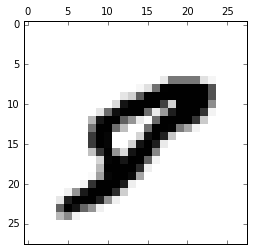

In [34]:
show_img(50)

In [17]:
residual = [val!=valb for i, (val,valb) in enumerate(zip(ys,y_fit))]
residual = np.array(residual)
X_images = np.array(X_test).reshape(len(X_test),28,28)
X_residual = X_images[residual]

In [18]:
def plot_averages(data,actual):
    fig = plt.figure(figsize = (10,6))
    for i in range(10):
        plt.subplot(2,5,i+1).matshow(np.mean(data[np.array(actual==i)], axis=0),cmap=plt.cm.Greys)
        plt.title('Number: {}'.format(i))
        plt.subplot(2,5,i+1).xaxis.set_ticks_position('bottom')

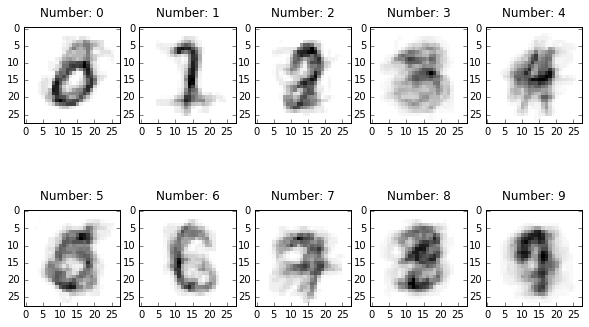

In [21]:
plot_averages(X_residual,ys[residual])

# Confusion

In [22]:
confusion = np.zeros([10,10])
for i,j in zip(ys,y_fit):
    confusion[i][j]+=1

In [23]:
percentage = confusion/np.sum(confusion, axis=1)

In [24]:
for i in range(10):
    percentage[i][i] = 0

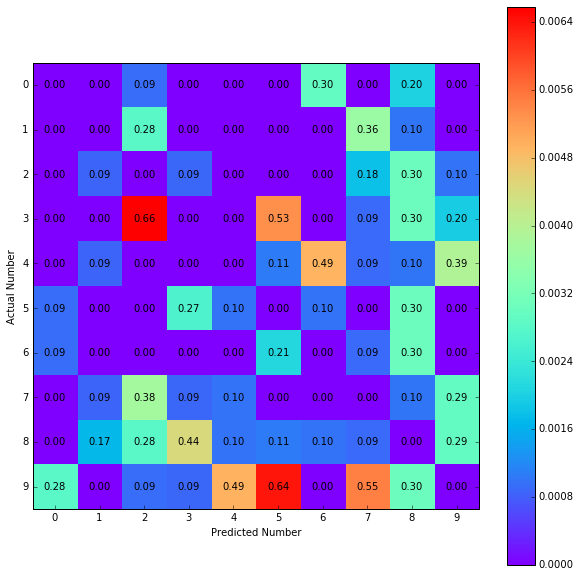

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
# plt.figure()
c = ax.matshow(percentage,cmap=plt.cm.rainbow)
fig.colorbar(c)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted Number')
plt.ylabel('Actual Number')

for (i, j), z in np.ndenumerate(percentage):
    ax.text(j, i, '{:0.2f}'.format(z*100), ha='center', va='center')
    ax.xaxis.set_ticks_position('bottom')

In [26]:
from sklearn.metrics import classification_report

In [27]:
print classification_report(ys,y_fit,digits=5)

             precision    recall  f1-score   support

          0    0.99530   0.99437   0.99483      1065
          1    0.99570   0.99314   0.99442      1167
          2    0.98233   0.99248   0.98738      1064
          3    0.99020   0.98406   0.98712      1129
          4    0.99206   0.98717   0.98961      1013
          5    0.98416   0.99044   0.98729       941
          6    0.99019   0.99311   0.99165      1016
          7    0.98552   0.99000   0.98776      1100
          8    0.97976   0.98274   0.98125       985
          9    0.98710   0.97549   0.98126      1020

avg / total    0.98840   0.98838   0.98838     10500

